# Structural analysis in cerebellar granular layer simulations
First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../..')
os.getcwd()
import sys
import numpy
import scipy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/TestStructure/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestStructureNetwork'
simulation_time = 1.0
analysis_time = 1.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 1234567
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = False
simulation.config_options['simulation']['state_recording_step'] = 100
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network structure parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['grclayer']['density_of_neurons'] = 4.0e6
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgrcsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells'] = 4.0
simulation.config_options['mfgrcsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GoC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 228
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 20.0
#simulation.config_options['mfgocsynapsis']['average_dendritic_length'] = 56.0e-3 # Dendritic length (in mm)
# Set the GrC-GoC connectivity rules and parameters
simulation.config_options['grcgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['grcgocsynapsis']['average_number_of_source_cells'] = 4788
simulation.config_options['grcgocsynapsis']['std_number_of_source_cells'] = 200.0
#simulation.config_options['grcgocsynapsis']['average_dendritic_length'] = 191.0e-3 # Dendritic length (in mm)
# Set the GoC-GrC connectivity rules and parameters
simulation.config_options['gocgrcsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['gocgrcsynapsis']['average_number_of_source_cells'] = 10.4
simulation.config_options['gocgrcsynapsis']['std_number_of_source_cells'] = 1.0 
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['connectivity_type'] = 'random_with_probability'
simulation.config_options['gocgocsynapsis']['connection_probability'] = 1.0
#simulation.config_options['gocgocsynapsis']['average_dendritic_length'] = 230.0e-3 # Dendritic length (in mm)

Initialize the simulation

In [5]:
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-04-05 11:52:20,661 - P32487 - MemTotal:69M - Simulation - DEBUG: Simulation time fixed to 1.0s
2018-04-05 11:52:20,691 - P32487 - MemTotal:69M - Simulation - DEBUG: Creating cerebellum generator
2018-04-05 11:52:21,207 - P32487 - MemTotal:85M - Simulation - DEBUG: Initializing cerebellum generator
2018-04-05 11:52:21,210 - P32487 - MemTotal:85M - Simulation - DEBUG: Cerebellar simulation initialized
2018-04-05 11:52:21,218 - P32487 - MemTotal:86M - Simulation - DEBUG: NEST module loaded
2018-04-05 11:52:21,254 - P32487 - MemTotal:89M - Simulation - DEBUG: Setting Global NEST Seed: 1234578
2018-04-05 11:52:21,256 - P32487 - MemTotal:89M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [1234579, 1234580, 1234581, 1234582, 1234583, 1234584, 1234585, 1234586, 1234587, 1234588]
2018-04-05 11:52:21,271 - P32487 - MemTotal:89M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2018-04-05 11:52:21,273 - P32487 - MemTotal:89M - 

## Neuronal elements

Print the number of neurons of each type

In [6]:
mfnumber = simulation.cerebellum.get_number_of_elements(layer='mflayer')
print 'Number of Mossy Fibers:',mfnumber
grcnumber = simulation.cerebellum.get_number_of_elements(layer='grclayer')
print 'Number of granule cells:',grcnumber
gocnumber = simulation.cerebellum.get_number_of_elements(layer='goclayer')
print 'Number of Golgi cells:',gocnumber

Number of Mossy Fibers: 2400
Number of granule cells: 32000
Number of Golgi cells: 72


Plot the histogram of neuron position for each axis

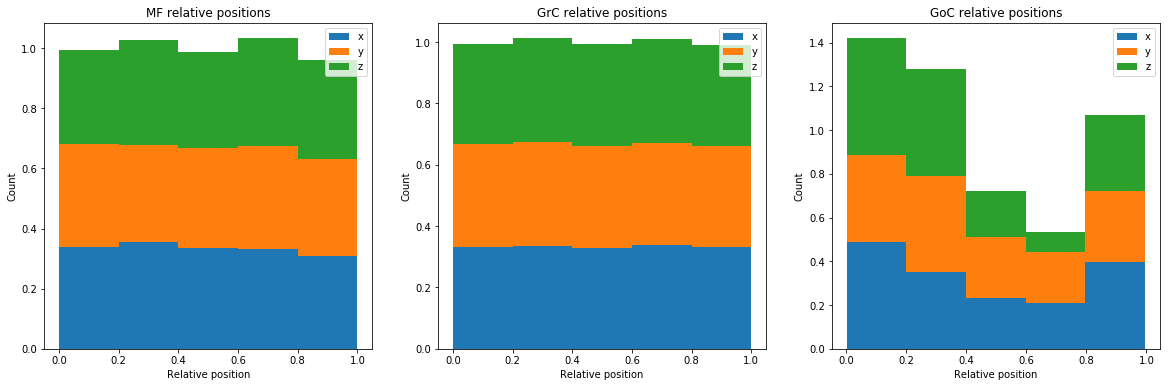

In [7]:
mfpositions = simulation.cerebellum.mflayer.get_relative_coordinates()
grcpositions = simulation.cerebellum.grclayer.get_relative_coordinates()
gocpositions = simulation.cerebellum.goclayer.get_relative_coordinates()
positions = [mfpositions, grcpositions, gocpositions]
n_bins = 5
labels = ['x','y','z']
title = ['MF relative positions', 'GrC relative positions', 'GoC relative positions']
plt.figure(figsize=(20,6))
for ind, cur_position in enumerate(positions):
    plt.subplot(1,len(positions),ind+1)
    plt.hist(cur_position, n_bins, normed=1, histtype='bar', stacked=True, label = labels)
    plt.xlabel('Relative position')
    plt.ylabel('Count')
    plt.title(title[ind])
    plt.legend()

## MF-GrC Connectivity Analysis

Histogram of input synapses for the granular cells

(array([    0.,     0.,    50.,  5046., 21934.,  4940.,    30.,     0.,
           0.,     0.]), array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]), <a list of 10 Patch objects>)


Text(0.5,0,u'Number of MF-GrC afferents')

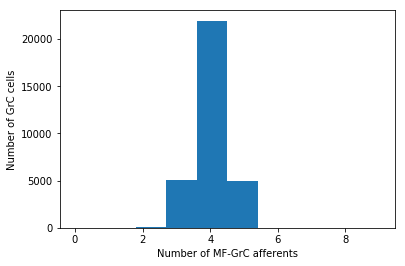

In [8]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
number_of_inputs = numpy.bincount(target_cell_index)
n=plt.hist(number_of_inputs, bins=10, range=(0,9))
print n
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of MF-GrC afferents')

Histogram of output synapses for the mossy fibers

(array([ 12.,  68., 253., 538., 635., 504., 269.,  96.,  19.,   6.]), array([31., 36., 41., 46., 51., 56., 61., 66., 71., 76., 81.]), <a list of 10 Patch objects>)


Text(0.5,0,u'Number of MF-GrC efferents')

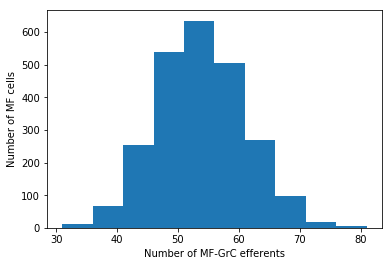

In [9]:
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
number_of_outputs = numpy.bincount(source_cell_index)
n = plt.hist(number_of_outputs, bins=10, range=None)
print n
plt.ylabel('Number of MF cells')
plt.xlabel('Number of MF-GrC efferents')

Histogram of distance between connected neurons

(127854, 3)
(127854, 3)
(array([ 1929.,  9698., 19532., 26805., 28576., 23668., 12721.,  4093.,
         760.,    72.]), array([0.00137512, 0.03242441, 0.06347371, 0.094523  , 0.12557229,
       0.15662158, 0.18767088, 0.21872017, 0.24976946, 0.28081876,
       0.31186805]), <a list of 10 Patch objects>)


Text(0.5,0,u'Distance between MF and GrC')

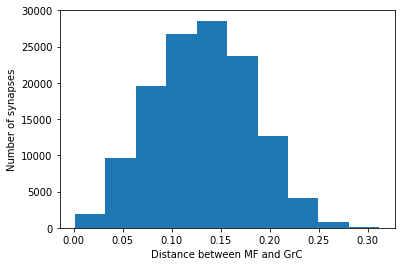

In [10]:
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
target_coord = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_layer.get_absolute_coordinates()[target_cell_index]
source_coord = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_layer.get_absolute_coordinates()[source_cell_index]
print source_coord.shape
print target_coord.shape
distance = numpy.linalg.norm(source_coord - target_coord,axis=1)
n = plt.hist(distance, bins=10, range=None)
print n
plt.ylabel('Number of synapses')
plt.xlabel('Distance between MF and GrC')

Plot the number of efferent synapses as a function of the position in the square

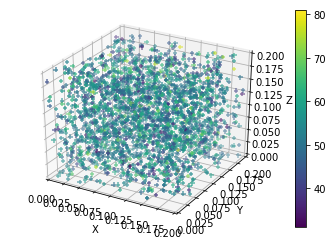

In [11]:
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_layer.get_absolute_coordinates()
number_of_outputs = numpy.bincount(source_cell_index)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(source_coord[:,0], source_coord[:,1], zs=source_coord[:,2], c=number_of_outputs, marker='+', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,simulation.config_options['network']['length'])
ax.set_ylim(0,simulation.config_options['network']['length'])
ax.set_zlim(0,simulation.config_options['network']['length'])
plt.colorbar()

Plot the number of efferent synapses as a function of the distance to the centre

Text(0,0.5,u'Number of efferent synapses')

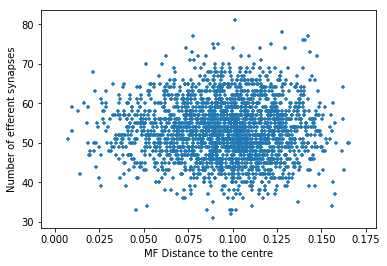

In [12]:
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_layer.get_absolute_coordinates()
centre_coord = numpy.array([simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2])
distance_to_centre = numpy.linalg.norm(source_coord - centre_coord,axis=1)
number_of_outputs = numpy.bincount(source_cell_index)
plt.scatter(distance_to_centre,number_of_outputs, marker='+',s=20)
plt.xlabel('MF Distance to the centre')
plt.ylabel('Number of efferent synapses')

## MF-GoC Connectivity Analysis

Histogram of input synapses for the Golgi cells (from MF)

(array([ 4.,  9., 13., 12., 12.,  9.,  9.,  2.,  0.,  2.]), array([184. , 194.2, 204.4, 214.6, 224.8, 235. , 245.2, 255.4, 265.6,
       275.8, 286. ]), <a list of 10 Patch objects>)


Text(0.5,0,u'Number of MF-GoC afferents')

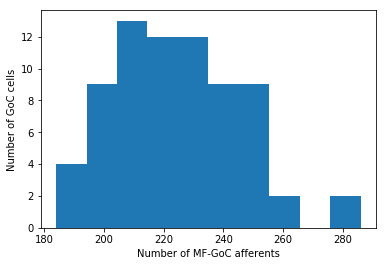

In [13]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
number_of_inputs = numpy.bincount(target_cell_index)
n=plt.hist(number_of_inputs, bins=(max(number_of_inputs)-min(number_of_inputs)+1)/10, range=None)
print n
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of MF-GoC afferents')

Histogram of output synapses for the mossy fibers

(array([  1.,   9.,  64., 131., 220., 358., 374., 381., 311., 233., 157.,
        75.,  45.,  23.,  17.,   1.]), array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
        6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
       13.125 , 14.0625, 15.    ]), <a list of 16 Patch objects>)


Text(0.5,0,u'Number of MF-GoC efferents')

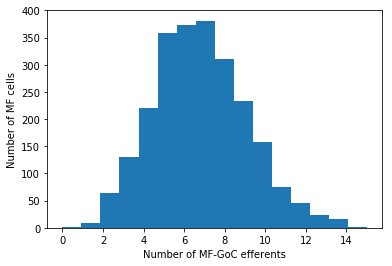

In [14]:
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
number_of_outputs = numpy.bincount(source_cell_index)
n = plt.hist(number_of_outputs, bins=max(number_of_outputs)-min(number_of_outputs)+1, range=None)
print n
plt.ylabel('Number of MF cells')
plt.xlabel('Number of MF-GoC efferents')

Histogram of distance between connected neurons

(16183, 3)
(16183, 3)
(array([ 316., 1152., 2079., 2880., 3384., 3150., 2082.,  893.,  219.,
         28.]), array([0.00598734, 0.03563471, 0.06528207, 0.09492943, 0.12457679,
       0.15422415, 0.18387151, 0.21351888, 0.24316624, 0.2728136 ,
       0.30246096]), <a list of 10 Patch objects>)


Text(0.5,0,u'Distance between MF and GoC')

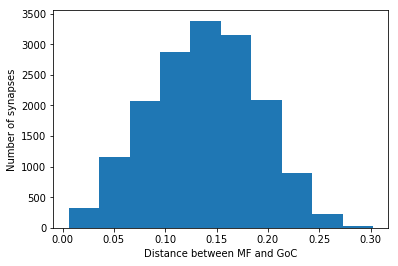

In [15]:
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_coord = simulation.cerebellum.layer_map['mfgocsynapsis'].target_layer.get_absolute_coordinates()[target_cell_index]
source_coord = simulation.cerebellum.layer_map['mfgocsynapsis'].source_layer.get_absolute_coordinates()[source_cell_index]
print source_coord.shape
print target_coord.shape
distance = numpy.linalg.norm(source_coord - target_coord,axis=1)
n = plt.hist(distance, bins=10, range=None)
print n
plt.ylabel('Number of synapses')
plt.xlabel('Distance between MF and GoC')

Plot the number of efferent synapses as a function of the position in the square

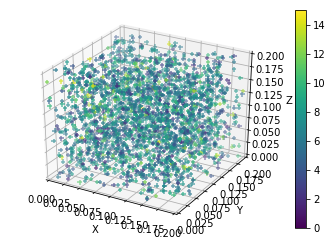

In [16]:
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['mfgocsynapsis'].source_layer.get_absolute_coordinates()
number_of_outputs = numpy.bincount(source_cell_index)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(source_coord[:,0], source_coord[:,1], zs=source_coord[:,2], c=number_of_outputs, marker='+', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,simulation.config_options['network']['length'])
ax.set_ylim(0,simulation.config_options['network']['length'])
ax.set_zlim(0,simulation.config_options['network']['length'])
plt.colorbar()

Plot the number of efferent synapses as a function of the distance to the centre

Text(0,0.5,u'Number of efferent synapses')

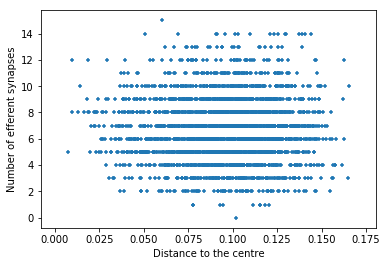

In [17]:
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['mfgocsynapsis'].source_layer.get_absolute_coordinates()
centre_coord = numpy.array([simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2])
distance_to_centre = numpy.linalg.norm(source_coord - centre_coord,axis=1)
number_of_outputs = numpy.bincount(source_cell_index)
plt.scatter(distance_to_centre,number_of_outputs, marker='+',s=20)
plt.xlabel('Distance to the centre')
plt.ylabel('Number of efferent synapses')

## GrC-GoC Connectivity Analysis

Histogram of input synapses for the Golgi cells (from GrC)

Text(0.5,0,u'Number of GrC-GoC afferents')

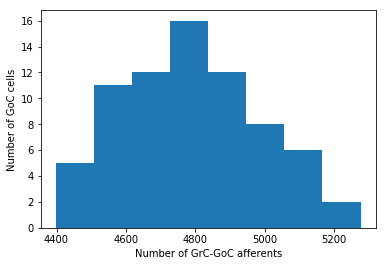

In [18]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
number_of_inputs = numpy.bincount(target_cell_index)
n=plt.hist(number_of_inputs, bins=(max(number_of_inputs)-min(number_of_inputs)+1)/100, range=None)
#print n
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of GrC-GoC afferents')

Histogram of output synapses for the granule cells

(array([1.000e+00, 1.800e+01, 1.030e+02, 2.720e+02, 5.850e+02, 1.233e+03,
       2.162e+03, 3.019e+03, 3.790e+03, 4.133e+03, 4.147e+03, 3.730e+03,
       3.011e+03, 2.241e+03, 1.477e+03, 9.310e+02, 5.630e+02, 3.060e+02,
       1.620e+02, 7.600e+01, 2.400e+01, 1.200e+01, 1.000e+00, 3.000e+00]), array([ 1.        ,  1.95833333,  2.91666667,  3.875     ,  4.83333333,
        5.79166667,  6.75      ,  7.70833333,  8.66666667,  9.625     ,
       10.58333333, 11.54166667, 12.5       , 13.45833333, 14.41666667,
       15.375     , 16.33333333, 17.29166667, 18.25      , 19.20833333,
       20.16666667, 21.125     , 22.08333333, 23.04166667, 24.        ]), <a list of 24 Patch objects>)


Text(0.5,0,u'Number of GrC-GoC efferents')

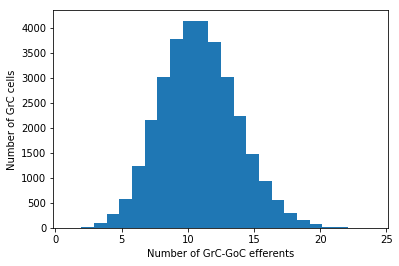

In [19]:
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
number_of_outputs = numpy.bincount(source_cell_index)
n = plt.hist(number_of_outputs, bins=max(number_of_outputs)-min(number_of_outputs)+1, range=None)
print n
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of GrC-GoC efferents')

Histogram of distance between connected neurons

(344968, 3)
(344968, 3)
(array([ 4810., 24012., 46513., 65978., 75662., 69162., 41018., 14759.,
        2847.,   207.]), array([0.00107941, 0.03253984, 0.06400028, 0.09546072, 0.12692115,
       0.15838159, 0.18984202, 0.22130246, 0.2527629 , 0.28422333,
       0.31568377]), <a list of 10 Patch objects>)


Text(0.5,0,u'Distance between GrC and GoC')

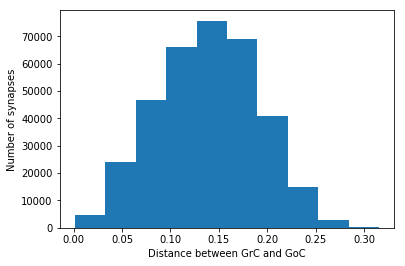

In [20]:
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
target_coord = simulation.cerebellum.layer_map['grcgocsynapsis'].target_layer.get_absolute_coordinates()[target_cell_index]
source_coord = simulation.cerebellum.layer_map['grcgocsynapsis'].source_layer.get_absolute_coordinates()[source_cell_index]
print source_coord.shape
print target_coord.shape
distance = numpy.linalg.norm(source_coord - target_coord,axis=1)
n = plt.hist(distance, bins=10, range=None)
print n
plt.ylabel('Number of synapses')
plt.xlabel('Distance between GrC and GoC')

Plot the number of efferent synapses as a function of the position in the square

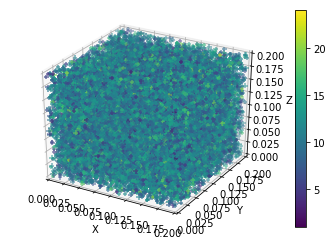

In [21]:
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['grcgocsynapsis'].source_layer.get_absolute_coordinates()
number_of_outputs = numpy.bincount(source_cell_index)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(source_coord[:,0], source_coord[:,1], zs=source_coord[:,2], c=number_of_outputs, marker='+', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,simulation.config_options['network']['length'])
ax.set_ylim(0,simulation.config_options['network']['length'])
ax.set_zlim(0,simulation.config_options['network']['length'])
plt.colorbar()

Plot the number of efferent synapses as a function of the distance to the centre

Text(0,0.5,u'Number of efferent synapses')

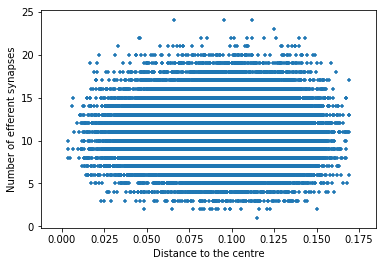

In [22]:
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['grcgocsynapsis'].source_layer.get_absolute_coordinates()
centre_coord = numpy.array([simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2])
distance_to_centre = numpy.linalg.norm(source_coord - centre_coord,axis=1)
number_of_outputs = numpy.bincount(source_cell_index)
plt.scatter(distance_to_centre,number_of_outputs, marker='+',s=20)
plt.xlabel('Distance to the centre')
plt.ylabel('Number of efferent synapses')

## GoC-GrC Connectivity Analysis

Histogram of input synapses for the Golgi cells (from MF)

(array([3.0000e+00, 5.0000e+01, 8.5300e+02, 4.9390e+03, 1.1444e+04,
       1.0389e+04, 3.7680e+03, 5.3000e+02, 2.4000e+01]), array([ 6.        ,  6.88888889,  7.77777778,  8.66666667,  9.55555556,
       10.44444444, 11.33333333, 12.22222222, 13.11111111, 14.        ]), <a list of 9 Patch objects>)


Text(0.5,0,u'Number of GoC-GrC afferents')

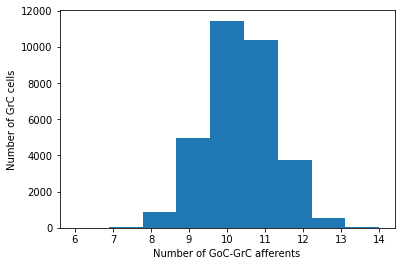

In [23]:
target_cell_index = simulation.cerebellum.layer_map['gocgrcsynapsis'].target_index
number_of_inputs = numpy.bincount(target_cell_index)
n=plt.hist(number_of_inputs, bins=(max(number_of_inputs)-min(number_of_inputs)+1), range=None)
print n
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of GoC-GrC afferents')

Histogram of output synapses for the mossy fibers

Text(0.5,0,u'Number of GoC-GrC efferents')

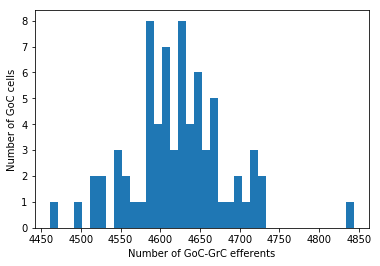

In [24]:
source_cell_index = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_index
number_of_outputs = numpy.bincount(source_cell_index)
n = plt.hist(number_of_outputs, bins=(max(number_of_outputs)-min(number_of_outputs)+1)/10, range=None)
#print n
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of GoC-GrC efferents')

Histogram of distance between connected neurons

(332804, 3)
(332804, 3)
(array([ 5286., 24448., 46279., 64797., 73454., 65458., 37814., 12840.,
        2299.,   129.]), array([0.00261071, 0.03418292, 0.06575512, 0.09732733, 0.12889953,
       0.16047174, 0.19204394, 0.22361615, 0.25518835, 0.28676056,
       0.31833276]), <a list of 10 Patch objects>)


Text(0.5,0,u'Distance between GoC and GrC')

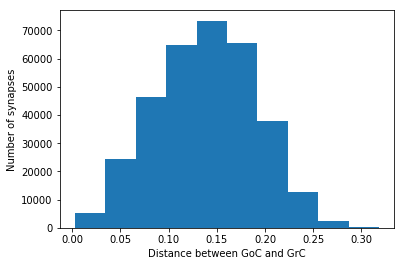

In [25]:
source_cell_index = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_index
target_cell_index = simulation.cerebellum.layer_map['gocgrcsynapsis'].target_index
target_coord = simulation.cerebellum.layer_map['gocgrcsynapsis'].target_layer.get_absolute_coordinates()[target_cell_index]
source_coord = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_layer.get_absolute_coordinates()[source_cell_index]
print source_coord.shape
print target_coord.shape
distance = numpy.linalg.norm(source_coord - target_coord,axis=1)
n = plt.hist(distance, bins=10, range=None)
print n
plt.ylabel('Number of synapses')
plt.xlabel('Distance between GoC and GrC')

Plot the number of efferent synapses as a function of the position in the square

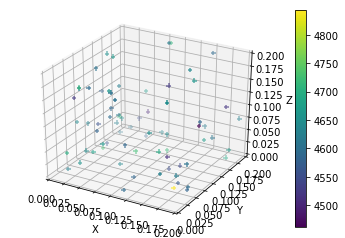

In [26]:
source_cell_index = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_layer.get_absolute_coordinates()
number_of_outputs = numpy.bincount(source_cell_index)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(source_coord[:,0], source_coord[:,1], zs=source_coord[:,2], c=number_of_outputs, marker='+', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,simulation.config_options['network']['length'])
ax.set_ylim(0,simulation.config_options['network']['length'])
ax.set_zlim(0,simulation.config_options['network']['length'])
plt.colorbar()

Plot the number of efferent synapses as a function of the distance to the centre

Text(0,0.5,u'Number of efferent synapses')

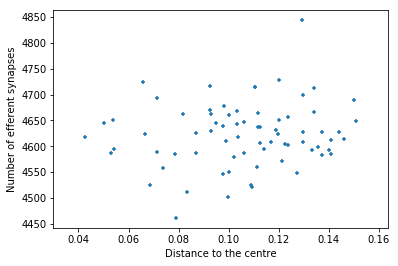

In [27]:
source_cell_index = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['gocgrcsynapsis'].source_layer.get_absolute_coordinates()
centre_coord = numpy.array([simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2])
distance_to_centre = numpy.linalg.norm(source_coord - centre_coord,axis=1)
number_of_outputs = numpy.bincount(source_cell_index)
plt.scatter(distance_to_centre,number_of_outputs, marker='+',s=20)
plt.xlabel('Distance to the centre')
plt.ylabel('Number of efferent synapses')

## GoC-GoC Connectivity Analysis

Histogram of input synapses for the Golgi cells (from MF)

(array([72.]), array([70.5, 71.5]), <a list of 1 Patch objects>)


Text(0.5,0,u'Number of GoC-GoC afferents')

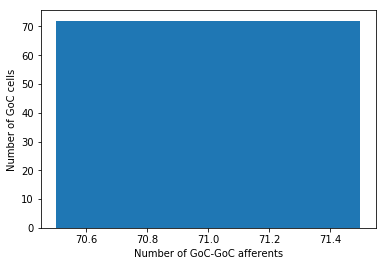

In [28]:
target_cell_index = simulation.cerebellum.layer_map['gocgocsynapsis'].target_index
number_of_inputs = numpy.bincount(target_cell_index)
n=plt.hist(number_of_inputs, bins=(max(number_of_inputs)-min(number_of_inputs)+1), range=None)
print n
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of GoC-GoC afferents')

Histogram of output synapses for the mossy fibers

(array([72.]), array([70.5, 71.5]), <a list of 1 Patch objects>)


Text(0.5,0,u'Number of GoC-GoC efferents')

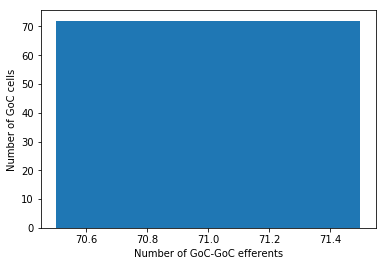

In [29]:
source_cell_index = simulation.cerebellum.layer_map['gocgocsynapsis'].source_index
number_of_outputs = numpy.bincount(source_cell_index)
n = plt.hist(number_of_outputs, bins=max(number_of_outputs)-min(number_of_outputs)+1, range=None)
print n
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of GoC-GoC efferents')

Histogram of distance between connected neurons

(5112, 3)
(5112, 3)
(array([126., 382., 618., 794., 928., 996., 776., 346., 136.,  10.]), array([0.01076596, 0.03940988, 0.06805379, 0.09669771, 0.12534163,
       0.15398554, 0.18262946, 0.21127338, 0.2399173 , 0.26856121,
       0.29720513]), <a list of 10 Patch objects>)


Text(0.5,0,u'Distance between GoC and GoC')

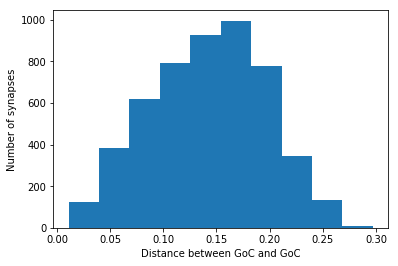

In [30]:
source_cell_index = simulation.cerebellum.layer_map['gocgocsynapsis'].source_index
target_cell_index = simulation.cerebellum.layer_map['gocgocsynapsis'].target_index
target_coord = simulation.cerebellum.layer_map['gocgocsynapsis'].target_layer.get_absolute_coordinates()[target_cell_index]
source_coord = simulation.cerebellum.layer_map['gocgocsynapsis'].source_layer.get_absolute_coordinates()[source_cell_index]
print source_coord.shape
print target_coord.shape
distance = numpy.linalg.norm(source_coord - target_coord,axis=1)
n = plt.hist(distance, bins=10, range=None)
print n
plt.ylabel('Number of synapses')
plt.xlabel('Distance between GoC and GoC')

Plot the number of efferent synapses as a function of the position in the square

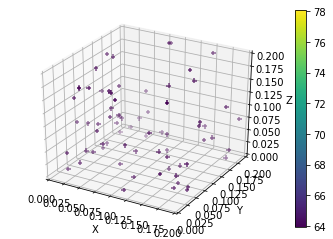

In [31]:
source_cell_index = simulation.cerebellum.layer_map['gocgocsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['gocgocsynapsis'].source_layer.get_absolute_coordinates()
number_of_outputs = numpy.bincount(source_cell_index)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(source_coord[:,0], source_coord[:,1], zs=source_coord[:,2], c=number_of_outputs, marker='+', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,simulation.config_options['network']['length'])
ax.set_ylim(0,simulation.config_options['network']['length'])
ax.set_zlim(0,simulation.config_options['network']['length'])
plt.colorbar()

Plot the number of efferent synapses as a function of the distance to the centre

Text(0,0.5,u'Number of efferent synapses')

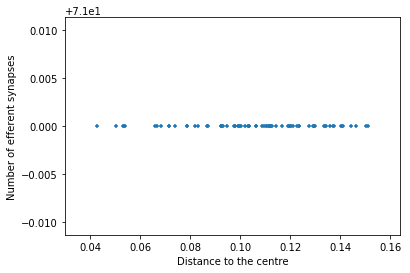

In [32]:
source_cell_index = simulation.cerebellum.layer_map['gocgocsynapsis'].source_index
source_coord = simulation.cerebellum.layer_map['gocgocsynapsis'].source_layer.get_absolute_coordinates()
centre_coord = numpy.array([simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2,simulation.config_options['network']['length']/2])
distance_to_centre = numpy.linalg.norm(source_coord - centre_coord,axis=1)
number_of_outputs = numpy.bincount(source_cell_index)
plt.scatter(distance_to_centre,number_of_outputs, marker='+',s=20)
plt.xlabel('Distance to the centre')
plt.ylabel('Number of efferent synapses')

## Pattern probability analysis

Define the parameter of the connectivity and patterns

In [69]:
rate_of_mf_in_pattern = 0.50
number_of_mf_states = 10
number_of_mf = simulation.cerebellum.get_number_of_elements(layer='mflayer')
number_of_grc = simulation.cerebellum.get_number_of_elements(layer='grclayer')
number_of_goc = simulation.cerebellum.get_number_of_elements(layer='goclayer')
mfgrc_fan_in = simulation.config_options['mfgrcsynapsis']['average_number_of_source_cells']
grcgoc_fan_in = simulation.config_options['grcgocsynapsis']['average_number_of_source_cells']

Calculate the probability of each GrC receiving several fibers with the same pattern input

In [70]:
# Probability of receiving at least 1 input in pattern
# Number of input combinations (without repeating mf)
import scipy.misc
possible_combinations = scipy.misc.comb(number_of_mf, mfgrc_fan_in, exact=False, repetition=False)
# Number of combinations with exactly 1 input in pattern
probability_of_none_in_pattern = numpy.power(1.0-rate_of_mf_in_pattern,mfgrc_fan_in)
probability_of_at_least_1_in_pattern = 1.0 - probability_of_none_in_pattern
probability_of_exactly_1_in_pattern = rate_of_mf_in_pattern*numpy.power(1.0-rate_of_mf_in_pattern,mfgrc_fan_in-1)*scipy.misc.comb(mfgrc_fan_in, 1, exact=False, repetition=False)
probability_of_at_least_2_in_pattern = 1.0 - (probability_of_none_in_pattern+probability_of_exactly_1_in_pattern)
probability_of_exactly_2_in_pattern = numpy.power(rate_of_mf_in_pattern,2.0)*numpy.power(1.0-rate_of_mf_in_pattern,mfgrc_fan_in-2)*scipy.misc.comb(mfgrc_fan_in, 2, exact=False, repetition=False)
probability_of_at_least_3_in_pattern = 1.0 - (probability_of_none_in_pattern+probability_of_exactly_1_in_pattern+probability_of_exactly_2_in_pattern)
probability_of_exactly_3_in_pattern = numpy.power(rate_of_mf_in_pattern,3.0)*numpy.power(1.0-rate_of_mf_in_pattern,mfgrc_fan_in-3)*scipy.misc.comb(mfgrc_fan_in, 3, exact=False, repetition=False)
probability_of_at_least_4_in_pattern = 1.0 - (probability_of_none_in_pattern+probability_of_exactly_1_in_pattern+probability_of_exactly_2_in_pattern+probability_of_exactly_3_in_pattern)

print 'Probability of 0 MF in pattern:',probability_of_none_in_pattern, 'Number of GrCs:',probability_of_none_in_pattern*number_of_grc,'Per GoCs:',probability_of_none_in_pattern*grcgoc_fan_in
print 'Probability of 1+ MF in pattern:',probability_of_at_least_1_in_pattern, 'Number of GrCs:',probability_of_at_least_1_in_pattern*number_of_grc,'Per GoCs:',probability_of_at_least_1_in_pattern*grcgoc_fan_in
print 'Probability of 2+ MF in pattern:',probability_of_at_least_2_in_pattern, 'Number of GrCs:',probability_of_at_least_2_in_pattern*number_of_grc,'Per GoCs:',probability_of_at_least_2_in_pattern*grcgoc_fan_in
print 'Probability of 3+ MF in pattern:',probability_of_at_least_3_in_pattern, 'Number of GrCs:',probability_of_at_least_3_in_pattern*number_of_grc,'Per GoCs:',probability_of_at_least_3_in_pattern*grcgoc_fan_in
print 'Probability of 4+ MF in pattern:',probability_of_at_least_4_in_pattern, 'Number of GrCs:',probability_of_at_least_4_in_pattern*number_of_grc,'Per GoCs:',probability_of_at_least_4_in_pattern*grcgoc_fan_in

Probability of 0 MF in pattern: 0.0625 Number of GrCs: 2000.0 Per GoCs: 299.25
Probability of 1+ MF in pattern: 0.9375 Number of GrCs: 30000.0 Per GoCs: 4488.75
Probability of 2+ MF in pattern: 0.6875 Number of GrCs: 22000.0 Per GoCs: 3291.75
Probability of 3+ MF in pattern: 0.3125 Number of GrCs: 10000.0 Per GoCs: 1496.25
Probability of 4+ MF in pattern: 0.0625 Number of GrCs: 2000.0 Per GoCs: 299.25
